In [45]:
import json
import gzip
import numpy as np
import pandas as pd
import pickle

from os import path
from PIL import Image

from wordcloud import WordCloud
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/Users/rodrigo/pytorch/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [46]:
sentiment_threshold = 0.5

In [2]:
entities_json_file_name = '../data/entities.json.pickle'

def read_entities(entities_json_file_name):
    def read_file(postfix):
        with gzip.open(entities_json_file_name + postfix, 'rb') as infile:
            return pickle.load(infile)
    return read_file('.gz.0') + read_file('.gz.1')

In [3]:
data = read_entities(entities_json_file_name)

In [47]:
entities = []

positives = []
neutral = []
negatives = []
for idx, row in data:
    js = json.loads(row)
    e = {}
    for entity in js['entities']:
        try:
            typ = entity['type']
            name = entity['name'].lower()
            salience = entity['salience']
            score = entity['sentiment']['score']
            magnitude = entity['sentiment']['magnitude']
            e[name] = score
            if score > sentiment_threshold:
                positives.append(name)
            elif score < -sentiment_threshold:
                negatives.append(name)
            else:
                # These are ignored
                pass
        except KeyError:
            neutral.append(name)
        
    entities.append(e)

In [34]:
index = 5
print(json.loads(data[index][1])['entities'][0]['name'])
json.loads(data[index][1])['entities'][0]

braking systems


{'mentions': [{'sentiment': {},
   'text': {'beginOffset': 452, 'content': 'braking systems'},
   'type': 'COMMON'},
  {'sentiment': {},
   'text': {'beginOffset': 633, 'content': 'braking systems'},
   'type': 'COMMON'},
  {'sentiment': {},
   'text': {'beginOffset': 811, 'content': 'braking systems'},
   'type': 'COMMON'}],
 'name': 'braking systems',
 'salience': 0.09255227446556091,
 'sentiment': {},
 'type': 'OTHER'}

In [18]:
entities[0]['activities'] < 0

False

In [48]:
#del data
show_top_n = 10
print('Positive:', positives[:show_top_n])
print('Neutral:', neutral[:show_top_n])
print('Negatives:', negatives[:show_top_n])

Positive: ['stuff', 'individuals', 'life', 'effect', 'email address', 'immigrants', 'cuddler', 'portland cuddly', 'event', 'cuddler']
Neutral: ['social media', 'lives', 'starbox', 'websites', 'facebook', 'activities', 'somebody', 'lake legal', 'divorce cases', 'cases']
Negatives: ['details', 'one', 'people', 'evidence', 'people', 'laundry', 'everyone', 'ramifications', 'kind', 'lot']


In [49]:
positives_text = " ".join(positives)
neutral_text = " ".join(neutral)
negatives_text = " ".join(negatives)

In [56]:
thumbs_up_mask = np.array(Image.open("../data/thumbs-up.jpg"))
thumbs_down_mask = np.array(Image.open("../data/thumbs-down.jpg"))

(-0.5, 1023.5, 1023.5, -0.5)

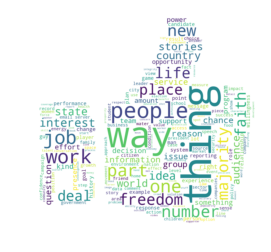

In [57]:
wordcloud_positives = WordCloud(background_color="white", mask=thumbs_up_mask).generate(positives_text)
plt.imshow(wordcloud_positives, interpolation='bilinear')
plt.axis("off")

In [60]:
wordcloud_positives.to_file("../data/positives.png")

(-0.5, 1023.5, 1023.5, -0.5)

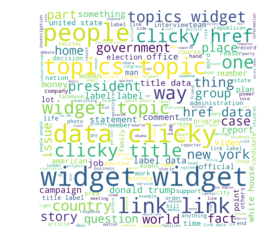

In [63]:
wordcloud_neutral = WordCloud(background_color="white", width=1024, height=1024).generate(neutral_text)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")

In [64]:
wordcloud_neutral.to_file("../data/neutral.png")

(-0.5, 625.5, 625.5, -0.5)

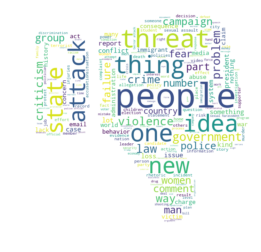

In [54]:
wordcloud_negatives = WordCloud(background_color="white", mask=thumbs_down_mask).generate(negatives_text)
plt.imshow(wordcloud_negatives, interpolation='bilinear')
plt.axis("off")

In [62]:
wordcloud_negatives.to_file("../data/negatives.png")

In [ ]:
del data